### (Fake) Scenario Project 1 
As a data scientist at Olist, a Brazilian e-commerce platform that connects small businesses to major marketplaces, the company is facing a critical challange: customer complains about delivery delays are increasing significantly after the peak holiday season. When customers shop during Black Friday, Christmas, and New year promotions, they ecpect their orders to arrive within the estimated timeframe.

However, with order volumes spiking by 300% during these periods, our delivery partners are struggling to keep up, leading to a 25% increase in late deliveries and a flood of negative reviews. The operation teams needs our help to understand the root causes these delays and build a predictive model that can accurately estimate delivery times, identify bottle neck region, and flag high-risk orders before they become new problems.

Using the 9 interconnected datasets covering 'customers', 'orders', 'items', 'payments', 'reviews', 'products', 'sellers', 'geolocation', and 'category translations', my goal is to develop a data driven solution that will not only improve customer satisfaction but also provide actionable insight to optimize our entire logistics operation. 

This model will ultimately help set more accurate delivery expectations, reduce complaint volume by 40%, and increase customer retention by 15% in the upcoming peak season.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from datetime import datetime
import streamlit as st
from scipy import stats
import logging
from pathlib import Path

# Display setting
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",100)
plt.style.use("ggplot")
print("Library ready")
print(f"Pandas version: {pd.__version__}")
print(f"Working dir: {os.getcwd()}")

Library ready
Pandas version: 2.1.4
Working dir: d:\portofolio-projects-learning\project-1-ecommerce-business-intelligence\phase-1-foundation


In [3]:
# check csv file 
csv_files = [f for f in os.listdir("data/raw") if f.endswith(".csv")]
print(f"Total file csv: {len(csv_files)}")
print("\nDaftar file: ")
for i, file in enumerate(csv_files, 1):
  print(f"{i:2d}. {file}")

Total file csv: 9

Daftar file: 
 1. olist_customers_dataset.csv
 2. olist_geolocation_dataset.csv
 3. olist_orders_dataset.csv
 4. olist_order_items_dataset.csv
 5. olist_order_payments_dataset.csv
 6. olist_order_reviews_dataset.csv
 7. olist_products_dataset.csv
 8. olist_sellers_dataset.csv
 9. product_category_name_translation.csv


In [4]:
# Load customer dataset
customers = pd.read_csv("data/raw/olist_customers_dataset.csv")
print("=" * 50)
print("Customer Dataset")
print("=" * 50)
print(f"Shape: {customers.shape[0]} rows × {customers.shape[1]} columns")
print("\nFirst 10 rows:")
display(customers.head(10))  
print("\nDataset info:")
customers.info()
print("\nDescriptive statistics:")
customers.describe(include='all')

Customer Dataset
Shape: 99441 rows × 5 columns

First 10 rows:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Descriptive statistics:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [5]:
# Load geolocation dataset
geolocation = pd.read_csv("data/raw/olist_geolocation_dataset.csv")
print("=" * 50)
print("Geolocation Dataset")
print("=" * 50)
print(f"Shape: {geolocation.shape[0]} rows × {geolocation.shape[1]} columns")
print("\nFirst 10 rows:")
display(geolocation.head(10))  
print("\nDataset info:")
geolocation.info()
print("\nDescriptive statistics:")
geolocation.describe(include='all')

Geolocation Dataset
Shape: 1000163 rows × 5 columns

First 10 rows:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

Descriptive statistics:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [6]:
# Load order item dataset
items = pd.read_csv("data/raw/olist_order_items_dataset.csv")
print("=" * 50)
print("Order Items Dataset")
print("=" * 50)
print(f"Shape: {items.shape[0]} rows × {items.shape[1]} columns")
print("\nFirst 10 rows:")
display(items.head(10))  
print("\nDataset info:")
items.info()
print("\nDescriptive statistics:")
items.describe(include='all')

Order Items Dataset
Shape: 112650 rows × 7 columns

First 10 rows:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Descriptive statistics:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [7]:
# Load order payments dataset
payments = pd.read_csv("data/raw/olist_order_payments_dataset.csv")
print("=" * 50)
print("Order Payments Dataset")
print("=" * 50)
print(f"Shape: {payments.shape[0]} rows × {payments.shape[1]} columns")
print("\nFirst 10 rows:")
display(payments.head(10))  
print("\nDataset info:")
payments.info()
print("\nDescriptive statistics:")
payments.describe(include='all')

Order Payments Dataset
Shape: 103886 rows × 5 columns

First 10 rows:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Descriptive statistics:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [8]:
# Load order payments dataset
reviews = pd.read_csv("data/raw/olist_order_reviews_dataset.csv")
print("=" * 50)
print("Order Reviews Dataset")
print("=" * 50)
print(f"Shape: {reviews.shape[0]} rows × {reviews.shape[1]} columns")
print("\nFirst 10 rows:")
display(reviews.head(10))  
print("\nDataset info:")
reviews.info()
print("\nDescriptive statistics:")
reviews.describe(include='all')

Order Reviews Dataset
Shape: 99224 rows × 7 columns

First 10 rows:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

Descriptive statistics:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [9]:
# Load orders dataset
orders = pd.read_csv("data/raw/olist_orders_dataset.csv")
print("=" * 50)
print("Orders Dataset")
print("=" * 50)
print(f"Shape: {orders.shape[0]} rows × {orders.shape[1]} columns")
print("\nFirst 10 rows:")
display(orders.head(10))  
print("\nDataset info:")
orders.info()
print("\nDescriptive statistics:")
orders.describe(include='all')

Orders Dataset
Shape: 99441 rows × 8 columns

First 10 rows:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Descriptive statistics:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [10]:
# Load products dataset
products = pd.read_csv("data/raw/olist_products_dataset.csv")
print("=" * 50)
print("Products Dataset")
print("=" * 50)
print(f"Shape: {products.shape[0]} rows × {products.shape[1]} columns")
print("\nFirst 10 rows:")
display(products.head(10))  
print("\nDataset info:")
products.info()
print("\nDescriptive statistics:")
products.describe(include='all')

Products Dataset
Shape: 32951 rows × 9 columns

First 10 rows:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Descriptive statistics:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [11]:
# Load products dataset
sellers = pd.read_csv("data/raw/olist_sellers_dataset.csv")
print("=" * 50)
print("Sellers Dataset")
print("=" * 50)
print(f"Shape: {sellers.shape[0]} rows × {sellers.shape[1]} columns")
print("\nFirst 10 rows:")
display(sellers.head(10))  
print("\nDataset info:")
sellers.info()
print("\nDescriptive statistics:")
sellers.describe(include='all')

Sellers Dataset
Shape: 3095 rows × 4 columns

First 10 rows:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

Descriptive statistics:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [12]:
# Load category translatoon dataset
category_translation = pd.read_csv("data/raw/product_category_name_translation.csv")
print("=" * 50)
print("Category Translation Dataset")
print("=" * 50)
print(f"Shape: {category_translation.shape[0]} rows × {category_translation.shape[1]} columns")
print("\nFirst 10 rows:")
display(category_translation.head(10))  
print("\nDataset info:")
category_translation.info()
print("\nDescriptive statistics:")
category_translation.describe(include='all')

Category Translation Dataset
Shape: 71 rows × 2 columns

First 10 rows:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

Descriptive statistics:


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [13]:
# Check missing values in all datasets
datasets = {
    'customers': customers,
    'geolocation': geolocation,
    'items': items,
    'payments': payments,
    'reviews': reviews,
    'orders': orders,
    'products': products,
    'sellers': sellers,
    'category_translation': category_translation
}

print("Missing Value Analysis")
print("=" * 40)

for name, df in datasets.items():
    print(f"\n {name} dataset")    
    print("-" * 40)
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    
    if len(missing) > 0:
        print(f"Found {len(missing)} columns with missing values:")
        for col, val in missing.items():
            missing_pct = (val / len(df)) * 100
            print(f"  • {col:30} : {val:6,} missing ({missing_pct:5.1f}%)")
    else:
        print("No missing values!")

Missing Value Analysis

 customers dataset
----------------------------------------
No missing values!

 geolocation dataset
----------------------------------------
No missing values!

 items dataset
----------------------------------------
No missing values!

 payments dataset
----------------------------------------
No missing values!

 reviews dataset
----------------------------------------
Found 2 columns with missing values:
  • review_comment_title           : 87,656 missing ( 88.3%)
  • review_comment_message         : 58,247 missing ( 58.7%)

 orders dataset
----------------------------------------
Found 3 columns with missing values:
  • order_approved_at              :    160 missing (  0.2%)
  • order_delivered_carrier_date   :  1,783 missing (  1.8%)
  • order_delivered_customer_date  :  2,965 missing (  3.0%)

 products dataset
----------------------------------------
Found 8 columns with missing values:
  • product_category_name          :    610 missing (  1.9%)
  • pr

In [14]:
# Data cleaning (Handling missing values)
print("=" * 60)
print("Data Cleaning - Handling Missing Values")
print("=" * 60)
# drop column with 88% missing values
print("\n Reviews:")
reviews_clean = reviews.copy()
reviews_clean = reviews_clean.drop('review_comment_title', axis =1)
reviews_clean['review_comment_message'] = reviews_clean["review_comment_message"].fillna('')
print(f" Dropped 'review_comment_title' column")
print(f" Filled missing 'review_comment_message' columns with '' ")
print(f" Shape after cleaning: {reviews_clean.shape}")
print(f" Total missing after cleaning: {reviews_clean.isnull().sum().sum()}")

Data Cleaning - Handling Missing Values

 Reviews:
 Dropped 'review_comment_title' column
 Filled missing 'review_comment_message' columns with '' 
 Shape after cleaning: (99224, 6)
 Total missing after cleaning: 0


In [15]:
# Data cleaning (Handling missing values)
print("=" * 60)
print("Data Cleaning - Handling Missing Values")
print("=" * 60)
# column 
print("\n Orders:")
oders_clean = orders.copy()
initial_len = len(oders_clean)

# Because dates can't be processed if filled with unknown or NaN
# drop rows with missing dates
oders_clean = oders_clean.dropna(subset=['order_approved_at',
                                 'order_delivered_carrier_date',
                                 'order_delivered_customer_date'])
dropped = initial_len - len(oders_clean)
print(f" Dropped {dropped} rows with missing dates")
print(f" Shape after cleaning: {oders_clean.shape}")
print(f" Total missing after cleaning: {oders_clean.isnull().sum().sum()}")

Data Cleaning - Handling Missing Values

 Orders:
 Dropped 2980 rows with missing dates
 Shape after cleaning: (96461, 8)
 Total missing after cleaning: 0


In [16]:
# Data cleaning (Handling missing values)
print("\n" + "=" * 60)
print("Data Cleaning - Handling Missing Values")
print("=" * 60)

print("\n Products:")
products_clean = products.copy()

# fill missing product_category_name column with 'Unknown'
products_clean['product_category_name'] = products_clean['product_category_name'].fillna('Unknown')
print(f" Filled 'product_category_name' column with 'Unknown'")

# fill missing product_name_length, product_description_length, and product_photos_qty column with median values
cols1 = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
for col in cols1:
  median_val = products_clean[col].median()
  products_clean[col] = products_clean[col].fillna(median_val)
  print(f" Filled '{col}' with median ({median_val:.2f})")

# drop rows the other rows with missing value
cols2 = ['product_weight_g','product_length_cm', 
                  'product_height_cm', 'product_width_cm']

initial_len = len(products_clean)
products_clean = products_clean.dropna(subset=cols2)
dropped = initial_len - len(products_clean)
print(f" Dropped {dropped} rows with missing dimensions")
print(f" Shape after cleaning: {products_clean.shape}")
print(f" Total missing after cleaning: {products_clean.isnull().sum().sum()}")


Data Cleaning - Handling Missing Values

 Products:
 Filled 'product_category_name' column with 'Unknown'
 Filled 'product_name_lenght' with median (51.00)
 Filled 'product_description_lenght' with median (595.00)
 Filled 'product_photos_qty' with median (1.00)
 Dropped 2 rows with missing dimensions
 Shape after cleaning: (32949, 9)
 Total missing after cleaning: 0


In [17]:
print("\n" + "=" * 60)
print("MISSING VALUE AFTER CLEANING")
print("=" * 60)

datasets_clean = {
    'reviews': reviews_clean,
    'orders': orders_clean,
    'products': products_clean
}

for name, df in datasets_clean.items():
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if len(missing) > 0:
        print(f"\n {name.upper()} - Still has missing values:")
        for col, val in missing.items():
            print(f"  • {col}: {val} missing ({(val/len(df)*100):.1f}%)")
    else:
        print(f"\n {name.upper()} - No missing values!")


MISSING VALUE AFTER CLEANING


NameError: name 'orders_clean' is not defined

In [ ]:
# Check data type (numerical)
print("=" * 60)
print("Data types analysis - numerical columns")
print("=" * 60)

for name in datasets:
  df = eval(name)
  num_cols = df.select_dtypes(include =['int64','float64']).columns
  if len(num_cols)>0:
    print(f"\n{name} dataset ({len(num_cols)}):")
    for col in num_cols:
      # Show sample values
      sample_vals = df[col].dropna().unique()[:3]
      print(f"- {col} -> sample: {sample_vals}")
  else:
    print(f"\n {name} dataset - no numerical columns")

Data types analysis - numerical columns

customers dataset (1):
- customer_zip_code_prefix -> sample: [14409  9790  1151]

geolocation dataset (3):
- geolocation_zip_code_prefix -> sample: [1037 1046 1041]
- geolocation_lat -> sample: [-23.54562128 -23.54608113 -23.54612897]
- geolocation_lng -> sample: [-46.63929205 -46.6448203  -46.64295148]

items dataset (3):
- order_item_id -> sample: [1 2 3]
- price -> sample: [ 58.9 239.9 199. ]
- freight_value -> sample: [13.29 19.93 17.87]

payments dataset (3):
- payment_sequential -> sample: [1 2 4]
- payment_installments -> sample: [8 1 2]
- payment_value -> sample: [99.33 24.39 65.71]

reviews dataset (1):
- review_score -> sample: [4 5 1]

 orders dataset - no numerical columns

products dataset (7):
- product_name_lenght -> sample: [40. 44. 46.]
- product_description_lenght -> sample: [287. 276. 250.]
- product_photos_qty -> sample: [1. 4. 2.]
- product_weight_g -> sample: [ 225. 1000.  154.]
- product_length_cm -> sample: [16. 30. 18.]


In [ ]:
# Check data types (categorical)
print("=" * 60)
print("Data types analysis - categorical columns")
print("=" * 60)

for name in datasets:
  df = eval(name)
  num_cols = df.select_dtypes(include =['object','category']).columns
  if len(num_cols)>0:
    print(f"\n{name} dataset ({len(num_cols)}):")
    for col in num_cols:
      # Show sample values
      sample_vals = df[col].dropna().unique()[:3]
      print(f"- {col} -> sample: {sample_vals}")
  else:
    print(f"\n {name} dataset - no categorical columns")

Data types analysis - categorical columns

customers dataset (4):
- customer_id -> sample: ['06b8999e2fba1a1fbc88172c00ba8bc7' '18955e83d337fd6b2def6b18a428ac77'
 '4e7b3e00288586ebd08712fdd0374a03']
- customer_unique_id -> sample: ['861eff4711a542e4b93843c6dd7febb0' '290c77bc529b7ac935b93aa66c333dc3'
 '060e732b5b29e8181a18229c7b0b2b5e']
- customer_city -> sample: ['franca' 'sao bernardo do campo' 'sao paulo']
- customer_state -> sample: ['SP' 'SC' 'MG']

geolocation dataset (2):
- geolocation_city -> sample: ['sao paulo' 'são paulo' 'sao bernardo do campo']
- geolocation_state -> sample: ['SP' 'RN' 'AC']

items dataset (4):
- order_id -> sample: ['00010242fe8c5a6d1ba2dd792cb16214' '00018f77f2f0320c557190d7a144bdd3'
 '000229ec398224ef6ca0657da4fc703e']
- product_id -> sample: ['4244733e06e7ecb4970a6e2683c13e61' 'e5f2d52b802189ee658865ca93d83a8f'
 'c777355d18b72b67abbeef9df44fd0fd']
- seller_id -> sample: ['48436dade18ac8b2bce089ec2a041202' 'dd7ddc04e1b6c2c614352b383efe2d36'
 '5b51032edd

In [ ]:
# Check distribution, skewness, and outlier for numerical columns
print("=" * 60)
print("DISTRIBUTION, SKEWNESS, AND OUTLIER ANALYSIS")
print("=" * 60)

# Numerical columns yang benar-benar akan dipakai
num_cols_clean = {
    'items': ['price', 'freight_value'],
    'payments': ['payment_installments', 'payment_value'],
    'reviews': ['review_score'],
    'products': ['product_name_lenght', 'product_description_lenght',
                 'product_photos_qty', 'product_weight_g', 'product_length_cm',
                 'product_height_cm', 'product_width_cm']
}

# Dataset yang sudah di-clean
datasets_clean = {
    'items': items_clean if 'items_clean' in dir() else items,
    'payments': payments_clean if 'payments_clean' in dir() else payments,
    'reviews': reviews_clean,
    'products': products_clean
}

# List untuk menyimpan hasil
results = []

# Loop setiap dataset
for dataset_name, cols in num_cols_clean.items():
    df = datasets_clean.get(dataset_name)
    if df is None:
        continue
    
    for col in cols:
        if col in df.columns:
            data = df[col].dropna()
            
            if len(data) == 0:
                continue
            
            # Basic statistics
            count = len(data)
            mean_val = data.mean()
            median_val = data.median()
            std_val = data.std()
            min_val = data.min()
            max_val = data.max()
            skew_val = data.skew()
            
            # Outlier detection using IQR
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            outlier_pct = (len(outliers) / len(data)) * 100
            
            # Interpretasi skewness
            if abs(skew_val) < 0.5:
                skew_cat = "Symmetric"
            elif abs(skew_val) < 1:
                skew_cat = "Moderately skewed"
            else:
                skew_cat = "HIGHLY SKEWED"
            
            # Simpan ke summary
            results.append({
                'Dataset': dataset_name,
                'Column': col,
                'Count': f"{count:,}",
                'Mean': round(mean_val, 2),
                'Median': round(median_val, 2),
                'Std': round(std_val, 2),
                'Min': round(min_val, 2),
                'Max': round(max_val, 2),
                'Skewness': round(skew_val, 2),
                'Skew Category': skew_cat,
                'Outliers': len(outliers),
                'Outliers %': round(outlier_pct, 1)
            })


if len(results) > 0:
    summary_df = pd.DataFrame(results)
    print(summary_df.to_string(index=False))
    
    # Highlight kolom yang perlu perhatian
    print("\n Highly Skewed Columns (|skew| > 1):")
    high_skew = summary_df[abs(summary_df['Skewness']) > 1]
    if len(high_skew) > 0:
        print(high_skew[['Dataset', 'Column', 'Skewness']].to_string(index=False))
    
    print("\n High Outlier Columns (>5% outliers):")
    high_outlier = summary_df[summary_df['Outliers %'] > 5]
    if len(high_outlier) > 0:
        print(high_outlier[['Dataset', 'Column', 'Outliers %']].to_string(index=False))
else:
    print("No numerical columns found in cleaned datasets")

DISTRIBUTION, SKEWNESS, AND OUTLIER ANALYSIS
 Dataset                     Column   Count    Mean  Median     Std  Min      Max  Skewness     Skew Category  Outliers  Outliers %
   items                      price 112,650  120.65   74.99  183.63 0.85  6735.00      7.92     HIGHLY SKEWED      8427         7.5
   items              freight_value 112,650   19.99   16.26   15.81 0.00   409.68      5.64     HIGHLY SKEWED     12134        10.8
payments       payment_installments 103,886    2.85    1.00    2.69 0.00    24.00      1.66     HIGHLY SKEWED      6313         6.1
payments              payment_value 103,886  154.10  100.00  217.49 0.00 13664.08      9.25     HIGHLY SKEWED      7981         7.7
 reviews               review_score  99,224    4.09    5.00    1.35 1.00     5.00     -1.36     HIGHLY SKEWED     14575        14.7
products        product_name_lenght  32,949   48.52   51.00   10.16 5.00    76.00     -0.92 Moderately skewed       290         0.9
products product_description_le

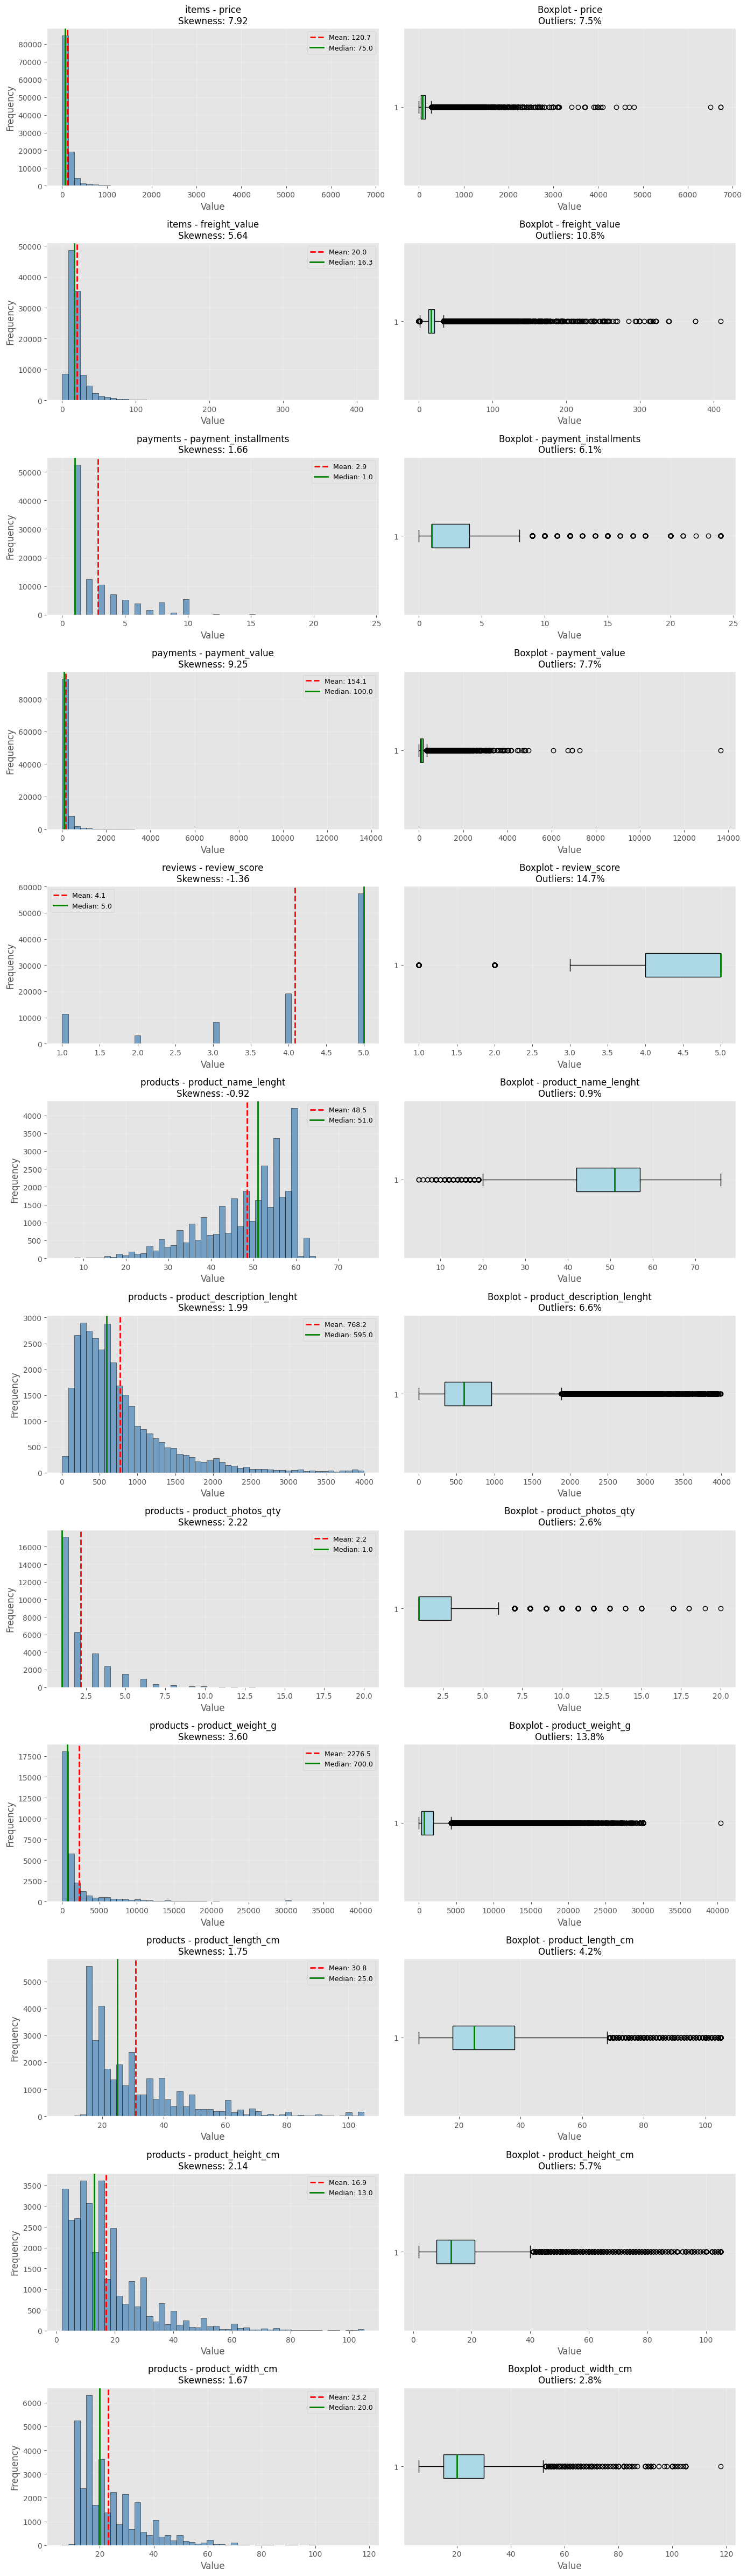


 Visualisasi selesai! 12 kolom divisualisasikan.


In [ ]:
# Visualize distributions after cleaning
plot_data = []

for dataset_name, cols in num_cols_clean.items():
    df = datasets_clean.get(dataset_name)
    if df is not None:
        for col in cols:
            if col in df.columns:
                data = df[col].dropna()
                if len(data) > 0:
                    plot_data.append((dataset_name, col, data))

if len(plot_data) > 0:
    n_cols = len(plot_data)
    fig, axes = plt.subplots(n_cols, 2, figsize=(14, 4*n_cols))
    
    if n_cols == 1:
        axes = axes.reshape(1, -1)
    
    for idx, (dataset_name, col, data) in enumerate(plot_data):
        if idx < n_cols:
            # Hitung outlier untuk visualisasi
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            outlier_pct = (len(outliers) / len(data)) * 100
            
            # Histogram 
            axes[idx, 0].hist(data, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
            axes[idx, 0].axvline(data.mean(), color='red', linestyle='--', 
                                  linewidth=2, label=f'Mean: {data.mean():.1f}')
            axes[idx, 0].axvline(data.median(), color='green', linestyle='-', 
                                  linewidth=2, label=f'Median: {data.median():.1f}')
            axes[idx, 0].set_title(f'{dataset_name} - {col}\nSkewness: {data.skew():.2f}', fontsize=12)
            axes[idx, 0].set_xlabel('Value')
            axes[idx, 0].set_ylabel('Frequency')
            axes[idx, 0].legend(fontsize=9)
            axes[idx, 0].grid(True, alpha=0.3)
            
            # BOXPLOT 
            axes[idx, 1].boxplot(data, vert=False, patch_artist=True,
                                 boxprops=dict(facecolor='lightblue'),
                                 medianprops=dict(color='green', linewidth=2))
            axes[idx, 1].set_title(f'Boxplot - {col}\nOutliers: {outlier_pct:.1f}%', fontsize=12)
            axes[idx, 1].set_xlabel('Value')
            axes[idx, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n Visualisasi selesai! {len(plot_data)} kolom divisualisasikan.")
else:
    print("No numerical columns to visualize")

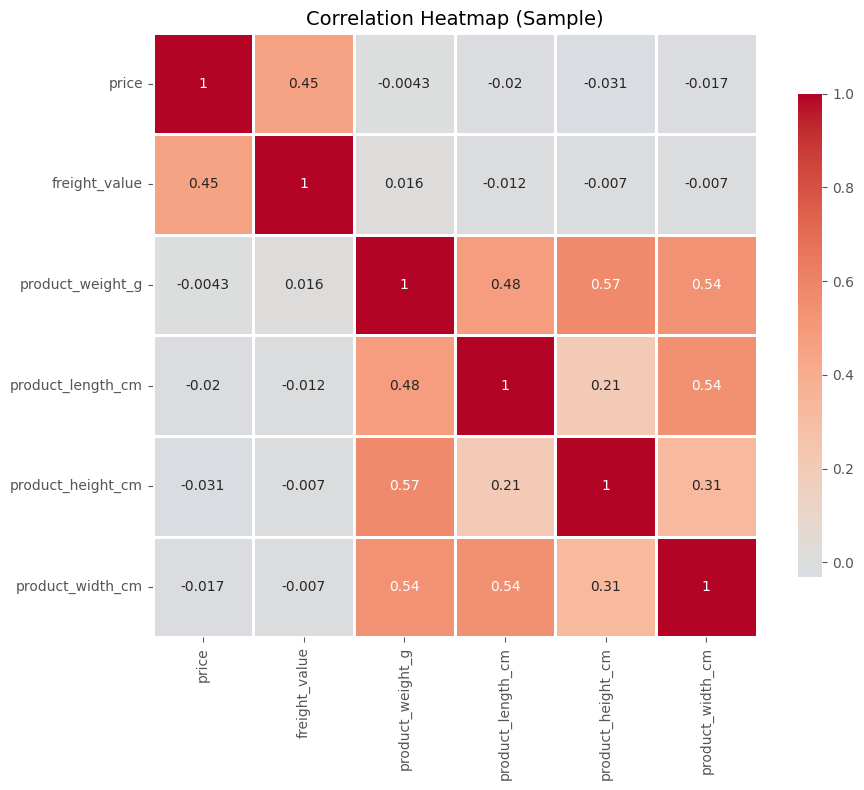

In [ ]:
# check heatmap
corr_data = []

if 'items' in datasets_clean and 'products' in datasets_clean:
    # using 5000 sample data
    items_sample = datasets_clean['items'][['price', 'freight_value']].sample(min(5000, len(datasets_clean['items'])))
    products_sample = datasets_clean['products'][['product_weight_g', 'product_length_cm', 
                                                   'product_height_cm', 'product_width_cm']].sample(min(5000, len(datasets_clean['products'])))
    
    combined = pd.concat([items_sample.reset_index(drop=True), 
                          products_sample.reset_index(drop=True)], axis=1)
    
    plt.figure(figsize=(10, 8))
    corr_matrix = combined.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap (Sample)', fontsize=14)
    plt.tight_layout()
    plt.show()

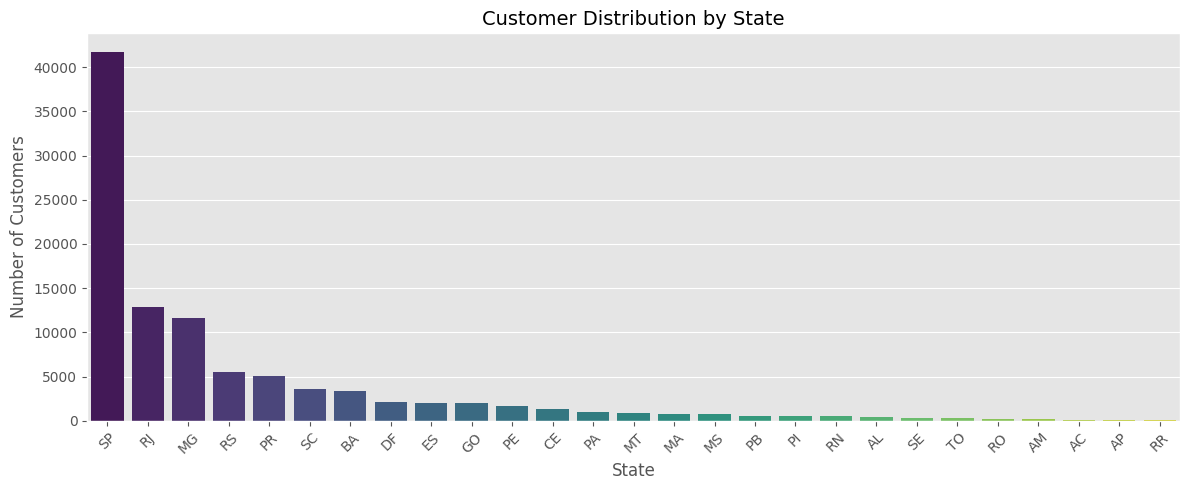

Total states: 27

All states:
  SP: 41,746
  RJ: 12,852
  MG: 11,635
  RS: 5,466
  PR: 5,045
  SC: 3,637
  BA: 3,380
  DF: 2,140
  ES: 2,033
  GO: 2,020
  PE: 1,652
  CE: 1,336
  PA: 975
  MT: 907
  MA: 747
  MS: 715
  PB: 536
  PI: 495
  RN: 485
  AL: 413
  SE: 350
  TO: 280
  RO: 253
  AM: 148
  AC: 81
  AP: 68
  RR: 46


In [ ]:
# Categorical variables visualization
# Customer state 
plt.figure(figsize=(12,5))
state_counts = customers['customer_state'].value_counts().reset_index()
state_counts.columns = ['state','count']
sns.barplot(data=state_counts, x='state', y= 'count', palette='viridis', legend=False, hue='state')
plt.title('Customer Distribution by State', fontsize=14)
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(f"Total states: {len(state_counts)}")
print(f"\nAll states:")
for idx, row in state_counts.iterrows():
    print(f"  {row['state']}: {row['count']:,}")

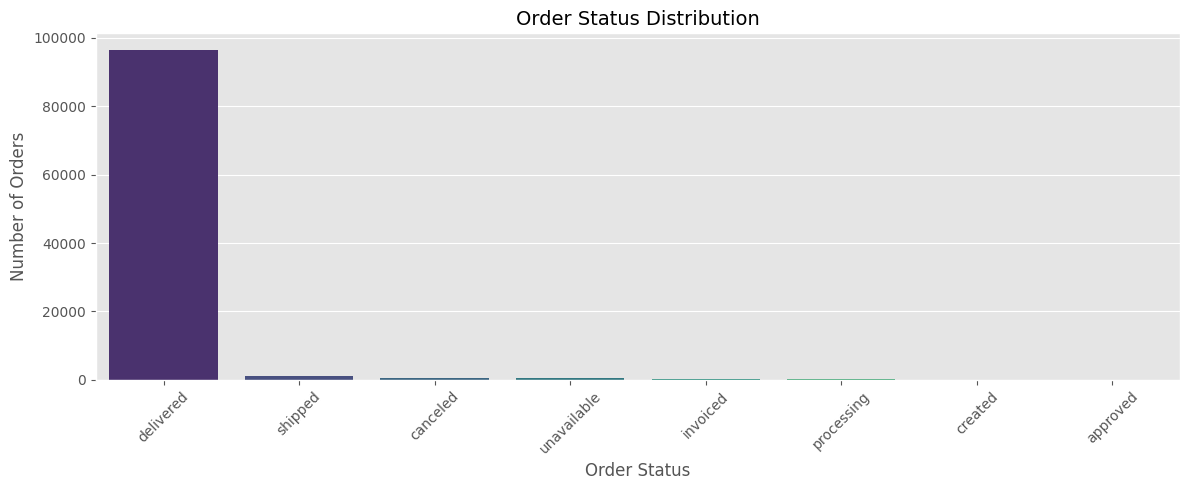

Total order status type: 8

All type of order status:
  delivered: 96,478
  shipped: 1,107
  canceled: 625
  unavailable: 609
  invoiced: 314
  processing: 301
  created: 5
  approved: 2


In [ ]:
# Order Status 
plt.figure(figsize=(12,5))
status_counts = orders['order_status'].value_counts().reset_index()
status_counts.columns = ['status','count']
sns.barplot(data=status_counts, x='status', y= 'count', palette='viridis', legend=False, hue='status')
plt.title('Order Status Distribution', fontsize=14)
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(f"Total order status type: {len(status_counts)}")
print(f"\nAll type of order status:")
for idx, row in status_counts.iterrows():
    print(f"  {row['status']}: {row['count']:,}")

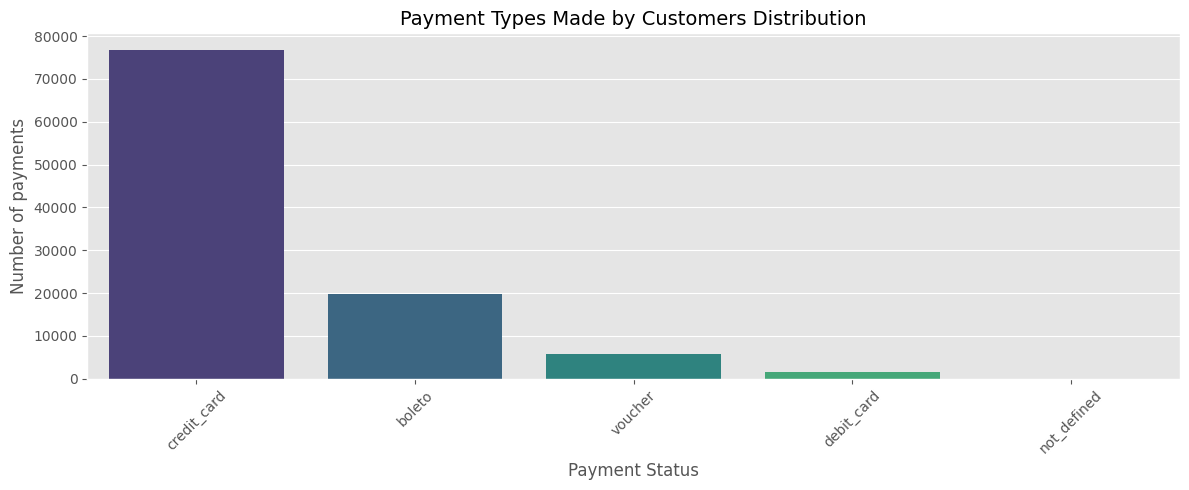

Total payment type: 5

All payment types made by customers:
  credit_card: 76,795
  boleto: 19,784
  voucher: 5,775
  debit_card: 1,529
  not_defined: 3


In [ ]:
# payment type
plt.figure(figsize=(12,5))
payment_counts = payments['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment','count']
sns.barplot(data=payment_counts, x='payment', y= 'count', palette='viridis', legend=False, hue='payment')
plt.title('Payment Types Made by Customers Distribution', fontsize=14)
plt.xlabel('Payment Status')
plt.ylabel('Number of payments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(f"Total payment type: {len(payment_counts)}")
print(f"\nAll payment types made by customers:")
for idx, row in payment_counts.iterrows():
    print(f"  {row['payment']}: {row['count']:,}")

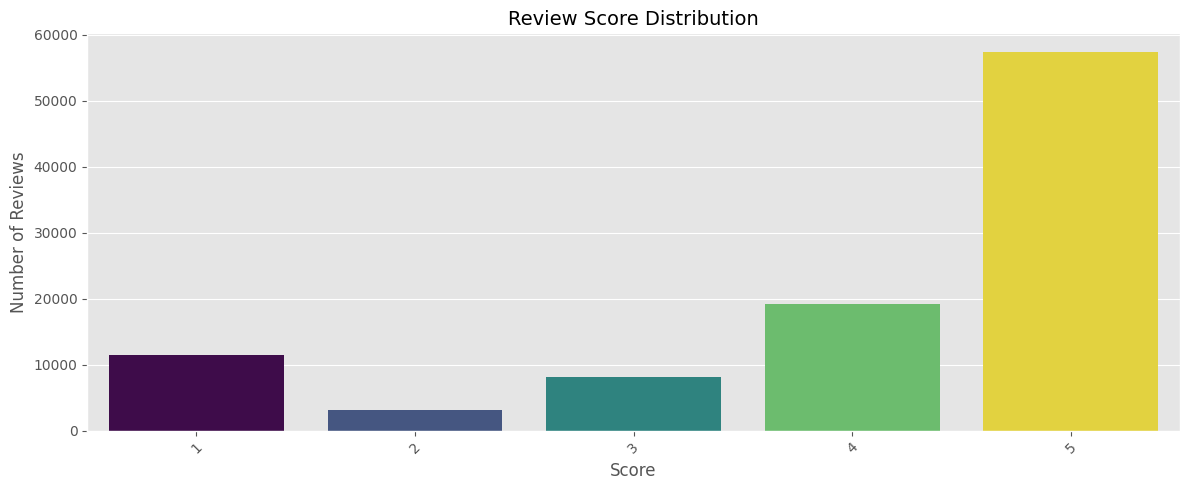

Total review score: 5

All review score made by customers:
  5: 57,328
  4: 19,142
  1: 11,424
  3: 8,179
  2: 3,151


In [ ]:
# Review Score
plt.figure(figsize=(12,5))
review_counts = reviews['review_score'].value_counts().reset_index()
review_counts.columns = ['review','count']
sns.barplot(data=review_counts, x='review', y= 'count', palette='viridis', legend=False, hue='review')
plt.title('Review Score Distribution', fontsize=14)
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(f"Total review score: {len(review_counts)}")
print(f"\nAll review score made by customers:")
for idx, row in review_counts.iterrows():
    print(f"  {row['review']}: {row['count']:,}")

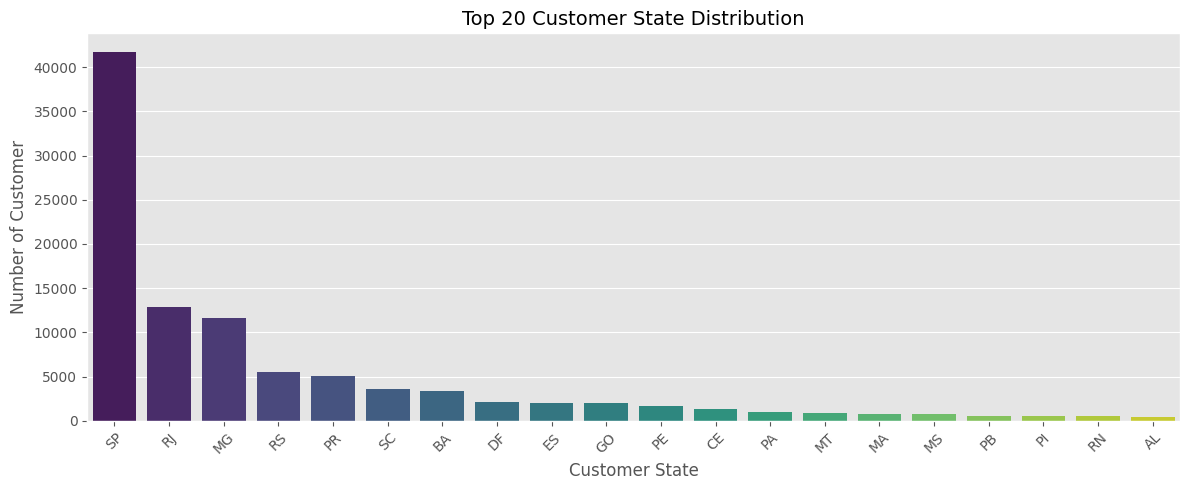

Total unique cities: 20

State name of all customer:
  SP: 41,746
  RJ: 12,852
  MG: 11,635
  RS: 5,466
  PR: 5,045
  SC: 3,637
  BA: 3,380
  DF: 2,140
  ES: 2,033
  GO: 2,020
  PE: 1,652
  CE: 1,336
  PA: 975
  MT: 907
  MA: 747
  MS: 715
  PB: 536
  PI: 495
  RN: 485
  AL: 413


In [ ]:
# Customer State 
plt.figure(figsize=(12,5))
cust_state_counts = customers['customer_state'].value_counts().head(20).reset_index()
cust_state_counts.columns = ['cust_state','count']
sns.barplot(data=cust_state_counts, x='cust_state', y= 'count', palette='viridis', legend=False, hue='cust_state')
plt.title('Top 20 Customer State Distribution', fontsize=14)
plt.xlabel('State')
plt.ylabel('Number of Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(f"Total unique cities: {len(cust_state_counts)}")
print(f"\nState name of all customer:")
for idx, row in cust_state_counts.iterrows():
    print(f"  {row['cust_state']}: {row['count']:,}")

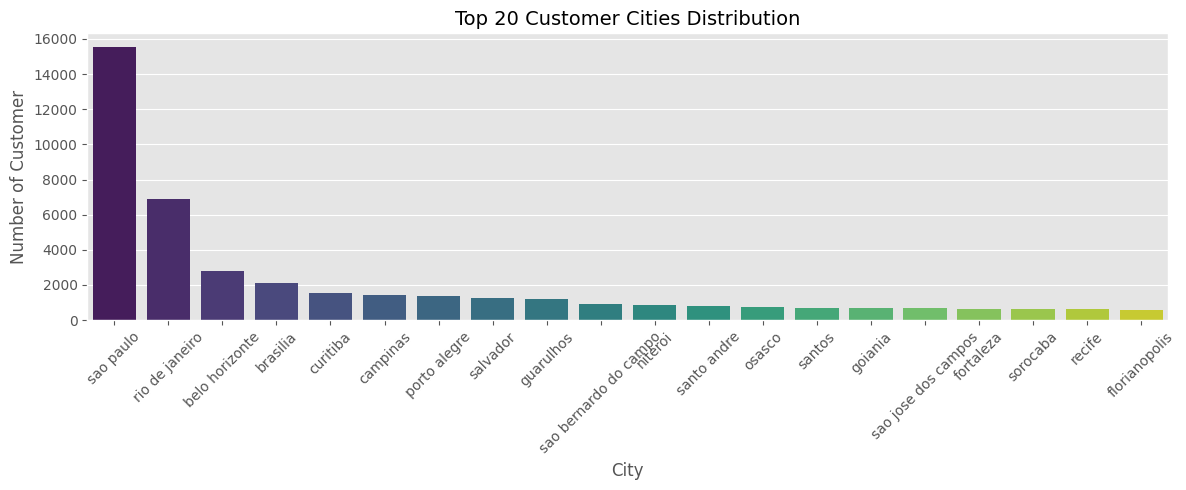

Total unique cities: 20

City name of all customer:
  sao paulo: 15,540
  rio de janeiro: 6,882
  belo horizonte: 2,773
  brasilia: 2,131
  curitiba: 1,521
  campinas: 1,444
  porto alegre: 1,379
  salvador: 1,245
  guarulhos: 1,189
  sao bernardo do campo: 938
  niteroi: 849
  santo andre: 797
  osasco: 746
  santos: 713
  goiania: 692
  sao jose dos campos: 691
  fortaleza: 654
  sorocaba: 633
  recife: 613
  florianopolis: 570


In [ ]:
# Customer Cities 
plt.figure(figsize=(12,5))
cust_city_counts = customers['customer_city'].value_counts().head(20).reset_index()
cust_city_counts.columns = ['cust_city','count']
sns.barplot(data=cust_city_counts, x='cust_city', y= 'count', palette='viridis', legend=False, hue='cust_city')
plt.title('Top 20 Customer Cities Distribution', fontsize=14)
plt.xlabel('City')
plt.ylabel('Number of Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(f"Total unique cities: {len(cust_city_counts)}")
print(f"\nCity name of all customer:")
for idx, row in cust_city_counts.iterrows():
    print(f"  {row['cust_city']}: {row['count']:,}")

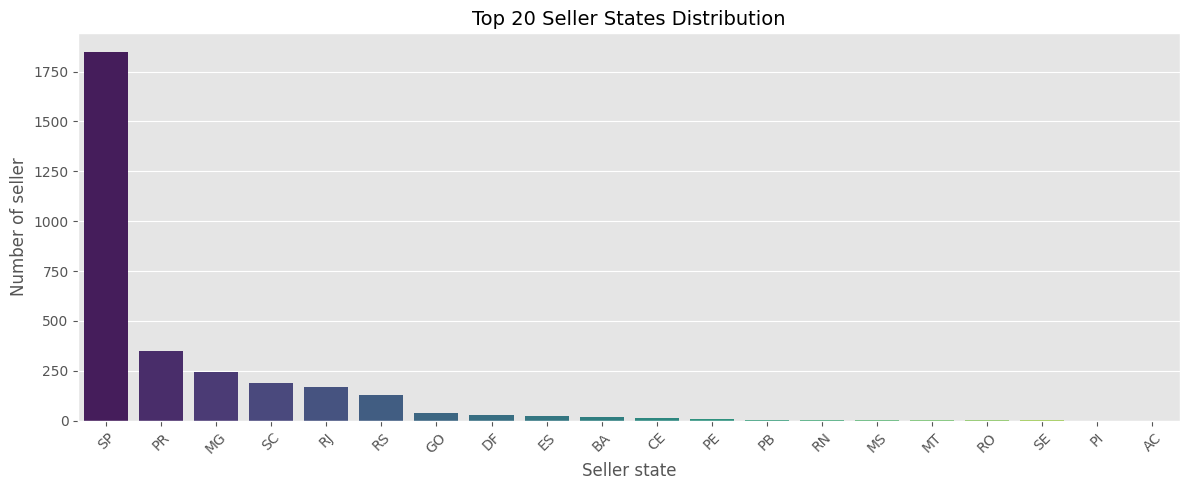

Total unique state of sellers: 20

State of all sellers:
  SP: 1,849
  PR: 349
  MG: 244
  SC: 190
  RJ: 171
  RS: 129
  GO: 40
  DF: 30
  ES: 23
  BA: 19
  CE: 13
  PE: 9
  PB: 6
  RN: 5
  MS: 5
  MT: 4
  RO: 2
  SE: 2
  PI: 1
  AC: 1


In [ ]:
# Seller state
plt.figure(figsize=(12,5))
seller_counts = sellers['seller_state'].value_counts().head(20).reset_index()
seller_counts.columns = ['state','count']
sns.barplot(data=seller_counts, x='state', y= 'count', palette='viridis', legend=False, hue='state')
plt.title('Top 20 Seller States Distribution', fontsize=14)
plt.xlabel('Seller state')
plt.ylabel('Number of seller')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(f"Total unique state of sellers: {len(seller_counts)}")
print(f"\nState of all sellers:")
for idx, row in seller_counts.iterrows():
    print(f"  {row['state']}: {row['count']:,}")

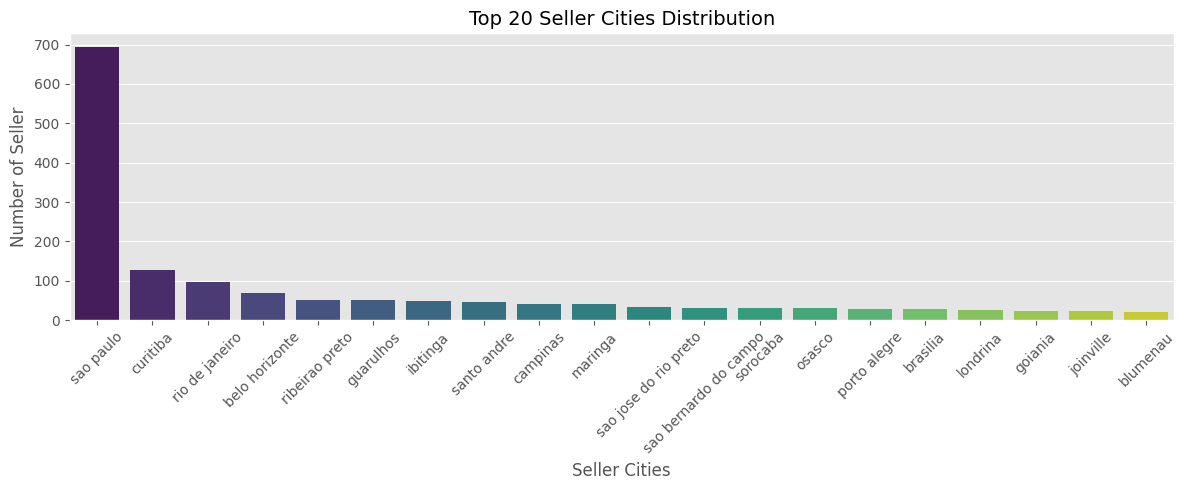

Total unique seller cities: 20

Citu of all sellers:
  sao paulo: 694
  curitiba: 127
  rio de janeiro: 96
  belo horizonte: 68
  ribeirao preto: 52
  guarulhos: 50
  ibitinga: 49
  santo andre: 45
  campinas: 41
  maringa: 40
  sao jose do rio preto: 33
  sao bernardo do campo: 32
  sorocaba: 32
  osasco: 32
  porto alegre: 28
  brasilia: 28
  londrina: 26
  goiania: 23
  joinville: 22
  blumenau: 21


In [ ]:
# Seller Cities 
plt.figure(figsize=(12,5))
seller_cities_counts = sellers['seller_city'].value_counts().head(20).reset_index()
seller_cities_counts.columns = ['s_cities','count']
sns.barplot(data=seller_cities_counts, x='s_cities', y= 'count', palette='viridis', legend=False, hue='s_cities')
plt.title('Top 20 Seller Cities Distribution', fontsize=14)
plt.xlabel('Seller Cities')
plt.ylabel('Number of Seller')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(f"Total unique seller cities: {len(seller_cities_counts)}")
print(f"\nCitu of all sellers:")
for idx, row in seller_cities_counts.iterrows():
    print(f"  {row['s_cities']}: {row['count']:,}")

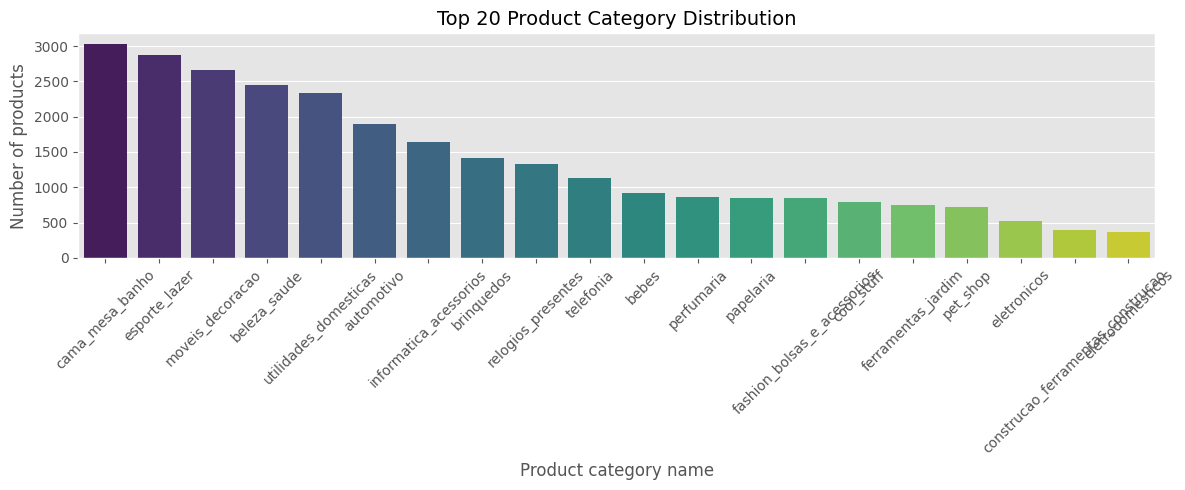

Total unique product category: 20

All product category:
  cama_mesa_banho: 3,029
  esporte_lazer: 2,867
  moveis_decoracao: 2,657
  beleza_saude: 2,444
  utilidades_domesticas: 2,335
  automotivo: 1,900
  informatica_acessorios: 1,639
  brinquedos: 1,411
  relogios_presentes: 1,329
  telefonia: 1,134
  bebes: 919
  perfumaria: 868
  papelaria: 849
  fashion_bolsas_e_acessorios: 849
  cool_stuff: 789
  ferramentas_jardim: 753
  pet_shop: 719
  eletronicos: 517
  construcao_ferramentas_construcao: 400
  eletrodomesticos: 370


In [ ]:
# Top Product by Category
plt.figure(figsize=(12,5))
category_counts = products['product_category_name'].value_counts().head(20).reset_index()
category_counts.columns = ['category_name','count']
sns.barplot(data=category_counts, x='category_name', y= 'count', palette='viridis', legend=False, hue='category_name')
plt.title('Top 20 Product Category Distribution', fontsize=14)
plt.xlabel('Product category name')
plt.ylabel('Number of products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(f"Total unique product category: {len(category_counts)}")
print(f"\nAll product category:")
for idx, row in category_counts.iterrows():
    print(f"  {row['category_name']}: {row['count']:,}")

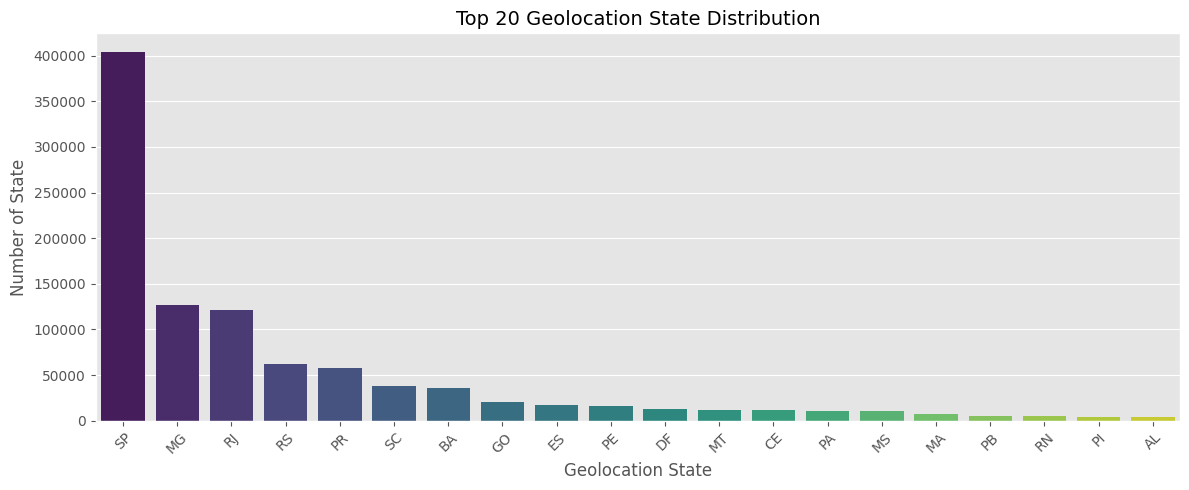

Total unique Geolocation State: 20

All Geolocation State:
  SP: 404,268
  MG: 126,336
  RJ: 121,169
  RS: 61,851
  PR: 57,859
  SC: 38,328
  BA: 36,045
  GO: 20,139
  ES: 16,748
  PE: 16,432
  DF: 12,986
  MT: 12,031
  CE: 11,674
  PA: 10,853
  MS: 10,431
  MA: 7,853
  PB: 5,538
  RN: 5,041
  PI: 4,549
  AL: 4,183


In [ ]:
# Geolocation State
plt.figure(figsize=(12,5))
geo_counts = geolocation['geolocation_state'].value_counts().head(20).reset_index()
geo_counts.columns = ['geo_state','count']
sns.barplot(data=geo_counts, x='geo_state', y= 'count', palette='viridis', legend=False, hue='geo_state')
plt.title('Top 20 Geolocation State Distribution', fontsize=14)
plt.xlabel('Geolocation State')
plt.ylabel('Number of State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(f"Total unique Geolocation State: {len(geo_counts)}")
print(f"\nAll Geolocation State:")
for idx, row in geo_counts.iterrows():
    print(f"  {row['geo_state']}: {row['count']:,}")

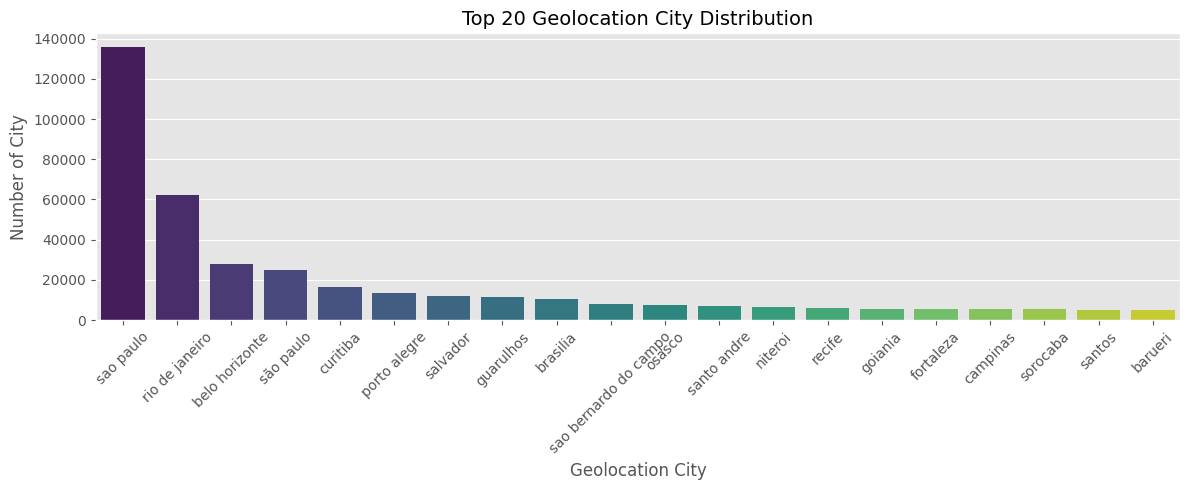

Total unique Geolocation City: 20

All Geolocation City:
  sao paulo: 135,800
  rio de janeiro: 62,151
  belo horizonte: 27,805
  são paulo: 24,918
  curitiba: 16,593
  porto alegre: 13,521
  salvador: 11,865
  guarulhos: 11,340
  brasilia: 10,470
  sao bernardo do campo: 8,112
  osasco: 7,658
  santo andre: 6,863
  niteroi: 6,534
  recife: 6,168
  goiania: 5,661
  fortaleza: 5,538
  campinas: 5,479
  sorocaba: 5,361
  santos: 5,000
  barueri: 4,971


In [ ]:
# Geolocation City
plt.figure(figsize=(12,5))
geo_city_counts = geolocation['geolocation_city'].value_counts().head(20).reset_index()
geo_city_counts.columns = ['geo_city','count']
sns.barplot(data=geo_city_counts, x='geo_city', y= 'count', palette='viridis', legend=False, hue='geo_city')
plt.title('Top 20 Geolocation City Distribution', fontsize=14)
plt.xlabel('Geolocation City')
plt.ylabel('Number of City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(f"Total unique Geolocation City: {len(geo_city_counts)}")
print(f"\nAll Geolocation City:")
for idx, row in geo_city_counts.iterrows():
    print(f"  {row['geo_city']}: {row['count']:,}")

In [ ]:
# Category Translation (Quick check)
print(f"\nTotal categories: {len(category_translation)}")
print(f"\nFirst 5 translations:")
for idx, row in category_translation.head().iterrows():
    print(f"  {row['product_category_name']:30} → {row['product_category_name_english']}")


Total categories: 71

First 5 translations:
  beleza_saude                   → health_beauty
  informatica_acessorios         → computers_accessories
  automotivo                     → auto
  cama_mesa_banho                → bed_bath_table
  moveis_decoracao               → furniture_decor


After all the exploration, I've found several interesting columns to work with. For numerical features, price shows a strong correlation with freight values, indicating that shipping costs tend to increase with product price. Additionally, product dimensions (height, width, length, and weight), are highly correlated with each other, suggesting the collectively represent the physical size and bulkiness of a product which likely impacts delivery logistics.

From the categorical analysis, I discover important patterns in customer and seller distribution. There is a clear tendency for both customers and sellers to be concentrated in Sao Paulo (SP), Brzil's economic center. This dominance suggest that the state plays a major role in the e-commerce ecosystem, with most transactions originating from or being delivered to this region.

I also discovered that credit card is the most popular payment method which could be useful for understanding customer behavior. While this payment method is dominant, the imbalance accros payments types might still provide valuable signals when we later design features. 

These insight, give me solid founfation for the next steps. They highlight which variables might be most predictive and point towards areas where I may need to dig deeper, particularly for underrepresented states and cities, to ensure our model generalize well across regions.

### Feature engineering (Phase 1)

As I move to feature engineering phase, to align with the main goal of building a system that provides accurate delivery expectations for customers, I need to identify and create the right features that influence delivery time. Based on my exploratory data analysis, I will focus on creating features from the following areas:
1. Order level aggregation: total price (more pricy the orders -> increase the priority for seller to deliver), number of items (more items -> more time for packing), total freight value (more freight value/shipping price -> far location)

2. Product level features: average product weight (more weight -> increase product handling like packing), dimensios (different dimension of product -> require spesifict type of delivery/ spesifict product handling), category (more fragile item for spesific category -> increase product handling)

3. Geographic features: customer state (remote areas -> longer delivery time because limited logistics infrastructure), seller state (lower proximity in distribution centers -> faster shipping and more courier options), intra-state indicator (same state -> faster because avoiding interstate logistics complexity)

4. Temporal features: customer purchase month (peak season makes the order volumes spike -> increasing the likelihood of delays for item to arrive), purchase day of week (purchase on friday afternoon or weekends -> may not be processed on the same or the next day), and purchase hour (late evening orders -> order won't be processed until the next morning)

5. Ratio features: freight to price ratio (more high ratio indicate either cheap products shipped from far away or heavy items shipped far -> potential delay due to distance or special handling requirements), price per item (higher price -> spesific handling products, lower price with multiple units -> need more packing time)

These features will serve as the foundation for building a predictive model that can estimate delivery time accurately, helping to set realistic customer expectations and reduce complaints.

In [18]:
# Order level aggregation features

# setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def create_order_level_features(items_df: pd.DataFrame) -> pd.DataFrame:
  """
  Create features aggregated at order level from items dataset.
  Features:
  - total_price: Sum of all item prices in the order that made by customers
  - avg_price: Average price per item
  - n_items: Total number of items in the order made by customers
  - total_freight: Sum of freight values
  - avg_freight: Average freight per item

  Args: 
    item_df: DataFrame with order items data
  Returns:
    DataFrame with order level features
  """
  logger.info("Creating order-level aggregation features...")

  # Group by order_id and aggregate
  items_agg = items_df.groupby('order_id').agg({
    'price': ['sum','mean','count'],
    'freight_value': ['sum', 'mean']
  }).round(2)

  # Flatten columns names
  items_agg.columns = ['total_price', 'avg_price', 'n_items',
                       'total_freight', 'avg_freight']
  items_agg = items_agg.reset_index()
  logger.info(f"Order level features created: {items_agg.shape}")
  logger.info(f"Features: {items_agg.columns.to_list()}")
  return items_agg

In [19]:
# Product level aggregation features

# setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def create_product_level_features(items_df: pd.DataFrame,
                                  products_df: pd.DataFrame) -> pd.DataFrame:
  """
  Create features aggregated at Product level from products dataset.
  Features:
  - total_weight: Total weight of all products (g) in the order that made by customers
  - avg_weight: Average weight per item in the order
  - n_items: Total number of items in the order made by customers
  - total_volume: Total volume of all products (volume: length x width x height in cm³)
  - avg_volume: Average volume per item
  - main_category: Most frequent product category in the order made by customer

  Args: 
    items_df: DataFrame with order items (has order_id, product_id)
    product_df: DataFrame with products details (has product_id, product_category_name,
    product_weight_g, product_length_cm, product_height_cm, product_width_cm)
  
  Returns:
    DataFrame with product level features per order
  """
  logger.info("Creating product-level aggregation features...")
  
  # Merge items with products dataset to get product attributes
  items_with_products = items_df.merge(
    products_df[['product_id','product_category_name','product_weight_g','product_length_cm',
                 'product_height_cm','product_width_cm']], 
                 on = 'product_id', how = 'left'
  )
  # Calculate volume per item (fill missing with 0)
  items_with_products['product_volume_cm3'] = (
    items_with_products['product_length_cm'].fillna(0) * items_with_products['product_width_cm'].fillna(0) * items_with_products['product_height_cm'].fillna(0)
  )
  # fill missing weight with 0
  items_with_products['product_weight_g'] = items_with_products['product_weight_g'].fillna(0) 
  
  # Group by order_id and aggregate
  product_agg = items_with_products.groupby('order_id').agg({
    'product_weight_g': ['sum','mean'],
    'product_volume_cm3': ['sum','mean'],
    'product_category_name': lambda x: x.mode()[0] if not x.mode().empty else 'unknown'
  }).round(2)
  
  # Flatten columns names
  product_agg.columns = ['total_weight', 'avg_weight', 'n_items',
                       'total_volume', 'avg_volume', 'main_category']
  product_agg = product_agg.reset_index()

    # Add n_items count
  n_items_per_order = items_df.groupby('order_id').size().reset_index(name='n_items')
  product_agg = product_agg.merge(n_items_per_order, on = 'order_id', how='left')

  logger.info(f"Product level features created: {products_agg.shape}")
  logger.info(f"Features: {product_agg.columns.to_list()}")
  return product_agg

In [20]:
# Geographic aggregation features

# setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def create_geographic_features(sellers_df: pd.DataFrame, customers_df: pd.DataFrame,
                                items_df: pd.DataFrame, orders_df: pd.DataFrame) -> pd.DataFrame:
  """
  Create geographic features by merging customer and seller locations.

  Features:
  - customer_state: State where customer is located
  - customer_city: City where seller is located
  - seller_state: State where seller is located
  - seller_city: City where seller is located
  - same_state: Binary indicator (1 if customer and seller in same state, 0 otherwise)
  - same_city: Binary indicator (1 if customer and seller in same city, 0 otherwise)

  Args: 
    customers_df: DataFrame with customer details (has customer_state, customer_city, customer_id)
    sellers_df: DataFrame with seller details (has seller_id, seller_state, seller_city)
    items_df: DataFrame with item details (has order_id, product_id, seller_id)
    orders_df: DataFrame with order details (has order_id, customer_id)

  
  Returns:
    DataFrame with geographic features per order
  """
  logger.info("Creating geographic aggregation features...")
  
  # Start with orders to get customer_id
  geo_features = orders_df[['order_id','customer_id']].copy()

  # Add customer location
  geo_features = geo_features.merge(
    customers_df[['customer_state','customer_city','customer_id']],
    on = 'customer_id', how = 'left'
  )

  # Get seller_id from items_df
  order_seller = items_df.groupby('order_id')['seller_id'].first().reset_index()

  # Add seller location
  order_seller = order_seller.merge(
    sellers_df[['seller_state','seller_city','seller_id']],
    on = 'seller_id', how = 'left'
  )

  # Create same state/city indicators
  geo_features['same_state'] = (geo_features['customer_state']== geo_features['seller_state']).astype(int)
  geo_features['same_city'] = (geo_features['customer_city']== geo_features['seller_city']).astype(int)

  # Drop rows with missing locations
  initial_len = len(geo_features)
  geo_features = geo_features.dropna(subset=['customer_state','seller_state'])
  dropped = initial_len - len(geo_features)
  
  logger.info(f"Geographic features created: {geo_features.shape}")
  logger.info(f"Dropped {dropped} rows with missing location data")
  logger.info(f"Features: {geo_features.columns.to_list()}")
  logger.info(f"Same state rate: {geo_features['same_state'].mean()*100:.2f}")
  logger.info(f"Same city rate: {geo_features['same_city'].mean()*100:.2f}")
  return geo_features

In [ ]:
# Temporal aggregation features

# setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def create_temporal_features(items_df: pd.DataFrame, orders_df: pd.DataFrame) -> pd.DataFrame:
  """
  Create temporal features by merging items and order times.

  Features:
  - purchase_month: Month when orders was placed (1-12) by customers
  - purchase_day_of_week: Day of week when orders was placed (0 = Monday, 6 = Sunday) by customers
  - purchase_hours: Hour when orders was placed (0-23) by customers
  - is_weekend: Binary inidcator (1 = if weekend, 0 = otherwise)
  - processing_time: Time from approval to carrier delivery (days)
  - estimated_vs_actual: Difference between estimated and actual delivery (days)
  - shipping_limit_days: Days until shipping deadline

  Args: 
    items_df: DataFrame with item details (has order_id, shipping_limit_date)
    orders_df: DataFrame with order details (has order_id, customer_id, order_purchase_timestamp, 
    order_approved_at, order_delivered_carrier_date, orde_delivered_customer_date, order_estimated_delivery_date, order_status)
  
  Returns:
    DataFrame with temporal features per order
  """
  logger.info("Creating temporal aggregation features...")
  
  # Start with orders dataframe
  temporal_features = orders_df[['order_id', 'order_purcgase_timestamp',
                            'order_approved_at', 'order_delivered_carrier_date', 
                            'order_delivered_customer_date', 'order_estimated_delivery_date']].copy()
  # Convert to datetime
  for col in ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date',
              'order_delivered_customer_date','order_estimated_delivery_date']:
    temporal_features[col] = pd.to_datetime(temporal_features[col])
    
  # Extract basic temporal features
  temporal_features['purchase_month'] = temporal_features['purchase_month'].dt.momth
  temporal_features['purchase_day_of_week'] = temporal_features['purchase_day_of_week'].dt.dayofweek
  temporal_features['purchase_hour'] = temporal_features['purchase_hour'].dt.hour
  temporal_features['is_weekend'] = (temporal_features['purchase_day_of_week'] >= 5).astype(int)

  # Add shipping list date from items
  shipping_limit = items_df.groupby('order_id')['shipping_limit_date'].min().reset_index()
  shipping_limit['shipping_limit_date'] = pd.to_datetime(shipping_limit['shipping_limit_date'])

  temporal_features = temporal_features.merge(
    shipping_limit[['order_id','shipping_limit_date']],
    on = 'order_id', how='left'
  )

  # Calculate time differences
  # Processing time (approval to carrier)
  temporal_features['processing_time_days'] = (temporal_features['ordered_delivered_carrier_date'] - temporal_features['order_approved_at']).dt.total_seconds() / (24*3600)

  # Estimated vs actual delivery
  temporal_features['estimated_vs_actual_days'] = (temporal_features['order_estimated_delivery_date'] - temporal_features['order_delivered_customer_date']).dt.total_seconds() / (24*3600)

  # Shipping limit days (time from purchase to shipping deadline)
  temporal_features['shipping_limit_days'] = (temporal_features['shipping_limit_date'] - temporal_features['order_purchase_timestamp']).dt.total_seconds() / (24*3600)

  # Holiday indicator (Brazil holidays, simplify to december (christmas) and november (black friday))
  temporal_features['is_peak_season'] = (temporal_features['purchase_month'] == 11 | temporal_features['purchase_month'] == 12).astype(int)

  logger.info(f"Temporal features created: {temporal_features.shape}")
  logger.info(f"Features: {temporal_features.columns.to_list()}")
  logger.info(f"Purchase months range: {temporal_features['purchase_month'].min()}-{temporal_features['purchase_month'].max()}")
  logger.info(f"Weekend purchases: {temporal_features['is_weekend'].mean()*100:.2f}%")
  logger.info(f"Peak season purchases: {temporal_features['is_peak_season'].mean()*100:.2f}%")
  return temporal_features

In [22]:
# Ratio aggregation features

# setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def add_ratio_to_df(df: pd.DataFrame) -> pd.DataFrame:
    """
    Add ratio features to an existing dataframe that already has order-level aggregations.
    
    Features:
    - freight_to_price_ratio: shipping cost / total price (high ratio = cheap products shipped far away, or heavy items)
    - price_per_item: total price / number of items (high = premium products, low + many items = bulk orders)
    - freight_per_item: total freight / number of items (average shipping cost per item)
    
    These ratios help capture relative relationships that absolute values might miss.
    High freight_to_price_ratio may indicate potential delays due to distance or special handling.
    
    Args:
        df: DataFrame with total_price, n_items, total_freight columns
        
    Returns:
        DataFrame with added ratio features
    """
    logger.info("Creating ratio aggregation features...")
    
    ratio_features = df.copy()
    epsilon = 1e-6  # Small value to avoid division by zero
    
    # Check if required columns exist
    required_cols = ['total_price', 'n_items', 'total_freight']
    missing_cols = [col for col in required_cols if col not in ratio_features.columns]
    
    if missing_cols:
        logger.warning(f"Missing columns: {missing_cols}. Cannot create all ratio features.")
        logger.warning("Please run order-level aggregation first to create these columns.")
        return ratio_features
    
    # Create ratio features
    ratio_features['freight_to_price_ratio'] = (ratio_features['total_freight'] / (ratio_features['total_price'] + epsilon)).round(4)
    ratio_features['price_per_item'] = (ratio_features['total_price'] / (ratio_features['n_items'] + epsilon)).round(2)
    ratio_features['freight_per_item'] = (ratio_features['total_freight'] / (ratio_features['n_items'] + epsilon)).round(2)
    
    # Log summary statistics
    added_features = ['freight_to_price_ratio', 'price_per_item', 'freight_per_item']
    logger.info(f"Added ratio features: {added_features}")
    logger.info(f"Shape after adding ratios: {ratio_features.shape}")
    
    # Log some statistics with Brazilian currency (R$)
    logger.info(f"Avg freight/price ratio: {ratio_features['freight_to_price_ratio'].mean():.4f}")
    logger.info(f"Avg price per item: R$ {ratio_features['price_per_item'].mean():,.2f}")
    logger.info(f"Avg freight per item: R$ {ratio_features['freight_per_item'].mean():,.2f}")
    return ratio_features

In [ ]:
# check all of our variable
print([var for var in dir() if not var.startswith('_')])

['In', 'Out', 'Path', 'add_ratio_to_df', 'category_translation', 'col', 'cols1', 'cols2', 'create_geographic_features', 'create_order_level_features', 'create_product_level_features', 'create_temporal_features', 'csv_files', 'customers', 'datasets', 'datetime', 'df', 'dropped', 'exit', 'file', 'geolocation', 'get_ipython', 'i', 'initial_len', 'items', 'logger', 'logging', 'median_val', 'missing', 'missing_pct', 'name', 'np', 'oders_clean', 'open', 'orders', 'os', 'payments', 'pd', 'plt', 'products', 'products_clean', 'quit', 'reviews', 'reviews_clean', 'sellers', 'sns', 'st', 'stats', 'val']


In [34]:
# make def engineer_features
def engineer_features(datasets):
    """
    Create all features by combining order, product, geographic, temporal, and ratio features.
    
    Args:
        datasets: Dictionary with all cleaned datasets
        (customers, orders, items, products, sellers)
        
    Returns:
        DataFrame with all engineered features
    """
    print("=" * 60)
    print("ENGINEERING ALL FEATURES")
    print("=" * 60)
    
    # Extract datasets
    customers = datasets['customers']
    orders = datasets['orders']
    items = datasets['items']
    products = datasets['products']
    sellers = datasets['sellers']
    
    # ORDER-LEVEL FEATURES
    print("\nCreating order-level features...")
    order_features = items.groupby('order_id').agg({
        'price': ['sum', 'mean', 'count'],
        'freight_value': ['sum', 'mean']
    }).round(2)
    order_features.columns = ['total_price', 'avg_price', 'n_items', 
                              'total_freight', 'avg_freight']
    order_features = order_features.reset_index()
    
    # Start building master dataframe
    master_df = orders.merge(order_features, on='order_id', how='left')
    print(f"  After order features: {master_df.shape}")
    
    # PRODUCT-LEVEL FEATURES
    print("\nCreating product-level features...")
    
    # Merge items with products
    items_with_products = items.merge(
        products[['product_id', 'product_category_name', 
                  'product_weight_g', 'product_length_cm', 
                  'product_height_cm', 'product_width_cm']],
        on='product_id',
        how='left'
    )
    
    # Calculate volume
    items_with_products['product_volume_cm3'] = (
        items_with_products['product_length_cm'].fillna(0) * 
        items_with_products['product_height_cm'].fillna(0) * 
        items_with_products['product_width_cm'].fillna(0)
    )
    
    # Fill missing weight
    items_with_products['product_weight_g'] = items_with_products['product_weight_g'].fillna(0)
    
    # Aggregate per order
    product_agg = items_with_products.groupby('order_id').agg({
        'product_weight_g': ['sum', 'mean'],
        'product_volume_cm3': ['sum', 'mean'],
        'product_category_name': lambda x: x.mode()[0] if not x.mode().empty else 'unknown'
    }).round(2)
    
    product_agg.columns = ['total_weight', 'avg_weight', 
                           'total_volume', 'avg_volume',
                           'main_category']
    product_agg = product_agg.reset_index()
    
    # Merge product features
    master_df = master_df.merge(product_agg, on='order_id', how='left')
    print(f" After product features: {master_df.shape}")
    
    # GEOGRAPHIC FEATURES
    print("\nCreating geographic features...")
    
    # Add customer state
    master_df = master_df.merge(
        customers[['customer_id', 'customer_state', 'customer_city']],
        on='customer_id',
        how='left'
    )
    
    # Get seller per order
    order_seller = items.groupby('order_id')['seller_id'].first().reset_index()
    order_seller = order_seller.merge(
        sellers[['seller_id', 'seller_state', 'seller_city']],
        on='seller_id',
        how='left'
    )
    
    # Add seller state
    master_df = master_df.merge(
        order_seller[['order_id', 'seller_state', 'seller_city']],
        on='order_id',
        how='left'
    )
    
    # Create same state/city indicators
    master_df['same_state'] = (master_df['customer_state'] == master_df['seller_state']).astype(int)
    master_df['same_city'] = (master_df['customer_city'] == master_df['seller_city']).astype(int)
    
    print(f"After geographic features: {master_df.shape}")
    
    # TEMPORAL FEATURES
    print("\nCreating temporal features...")
    
    # Convert to datetime
    master_df['order_purchase_timestamp'] = pd.to_datetime(master_df['order_purchase_timestamp'])
    
    # Extract basic temporal features
    master_df['purchase_month'] = master_df['order_purchase_timestamp'].dt.month
    master_df['purchase_day_of_week'] = master_df['order_purchase_timestamp'].dt.dayofweek
    master_df['purchase_hour'] = master_df['order_purchase_timestamp'].dt.hour
    master_df['is_weekend'] = (master_df['purchase_day_of_week'] >= 5).astype(int)
    
    print(f"After temporal features: {master_df.shape}")
    
    # RATIO FEATURES
    print("\nCreating ratio features...")
    
    epsilon = 1e-6
    master_df['freight_to_price_ratio'] = master_df['total_freight'] / (master_df['total_price'] + epsilon)
    master_df['price_per_item'] = master_df['total_price'] / (master_df['n_items'] + epsilon)
    master_df['freight_per_item'] = master_df['total_freight'] / (master_df['n_items'] + epsilon)
    
    print(f"After ratio features: {master_df.shape}")
    
    # CREATE TARGET VARIABLE
    print("\nCreating target variable...")
    
    # Convert delivery date
    master_df['order_delivered_customer_date'] = pd.to_datetime(master_df['order_delivered_customer_date'])
    
    # Calculate delivery time
    master_df['delivery_time_days'] = (
        master_df['order_delivered_customer_date'] - master_df['order_purchase_timestamp']
    ).dt.days
    
    # Filter valid delivery times
    initial_len = len(master_df)
    master_df = master_df[(master_df['delivery_time_days'] > 0) & (master_df['delivery_time_days'] < 60)]
    print(f"Filtered out {initial_len - len(master_df)} rows with invalid delivery times")
    
    print(f"\nFEATURE ENGINEERING COMPLETED")
    print(f"Final shape: {master_df.shape}")    
    return master_df

In [36]:
customers_clean = customers.copy()
items_clean = items.copy()
payments_clean = payments.copy()
sellers_clean = sellers.copy()
geolocation_clean = geolocation.copy()

datasets_clean = {
    'customers': customers_clean,
    'orders': oders_clean,
    'items': items_clean,
    'payments': payments_clean,
    'reviews': reviews_clean,
    'products': products_clean,
    'sellers': sellers_clean,
    'geolocation': geolocation_clean,
    'category_translation': category_translation
}

df_features_1 = engineer_features(datasets_clean)

from sklearn.model_selection import train_test_split
X = df_features_1.drop(['order_id', 'delivery_time_days'], axis=1)
y = df_features_1['delivery_time_days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nData ready for training")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

ENGINEERING ALL FEATURES

Creating order-level features...
  After order features: (96461, 13)

Creating product-level features...
 After product features: (96461, 18)

Creating geographic features...
After geographic features: (96461, 24)

Creating temporal features...
After temporal features: (96461, 28)

Creating ratio features...
After ratio features: (96461, 31)

Creating target variable...
Filtered out 319 rows with invalid delivery times

FEATURE ENGINEERING COMPLETED
Final shape: (96142, 32)

Data ready for training
X_train: (76913, 30)
X_test: (19229, 30)
